# K Means Classifier 

In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score

# Read dataset
X = pd.read_excel("../coffeeDataSynthesized.xlsx", "dataset")

# Extracting labels
y = np.where(X["type"] == "robusta", 0, 1)  # Convert type to numeric: 0 for robusta, 1 for arabica
y = pd.Series(y)

# Extracting the features for clustering
X = X[['width', 'height', 'depth', 'weight']]

# Function to initialize centroids randomly
def initialize_centroids(X, k):
    np.random.seed(44)  # For reproducibility
    random_idx = np.random.choice(X.shape[0], size=k, replace=False)
    return X[random_idx]

# Function to assign clusters based on the closest centroid
def assign_clusters(X, centroids):
    clusters = np.zeros(X.shape[0])
    for i in range(X.shape[0]):
        distances = np.linalg.norm(X[i] - centroids, axis=1)  # Compute distances to centroids
        clusters[i] = np.argmin(distances)  # Assign to the closest centroid
    return clusters

# Function to update centroids by taking the mean of points in each cluster
def update_centroids(X, clusters, k):
    new_centroids = np.zeros((k, X.shape[1]))
    for i in range(k):
        points_in_cluster = X[clusters == i]
        new_centroids[i] = points_in_cluster.mean(axis=0)
    return new_centroids

# K-means algorithm
def kmeans(X, k, max_iters=100):
    centroids = initialize_centroids(X, k)
    for _ in range(max_iters):
        clusters = assign_clusters(X, centroids)
        new_centroids = update_centroids(X, clusters, k)
        
        # Check for convergence (if centroids don't change)
        if np.all(centroids == new_centroids):
            break
        
        centroids = new_centroids
        
    return centroids, clusters

# Set number of clusters (2 categories)
k = 2

# Run k-means clustering on the features
centroids, clusters = kmeans(X.to_numpy(), k)

# Add the clusters to the original dataframe for comparison
X['cluster'] = clusters


def calculate_accuracy_from_clusters(Y, clusters):
    # Initialize an array for predicted labels based on cluster assignments
    predicted_labels = np.zeros_like(Y)
    
    for cluster_id in np.unique(clusters):
        cluster_indices = np.where(clusters == cluster_id)[0]
        
        # Find the most common label in this cluster
        majority_label = np.bincount(Y[cluster_indices]).argmax()
        
        predicted_labels[cluster_indices] = majority_label
    
    accuracy = accuracy_score(Y, predicted_labels)
    return accuracy


accuracy = calculate_accuracy_from_clusters(y, clusters)
print("Accuracy: {:.4f}".format(accuracy))

# Show the resulting centroids and cluster assignments
print("Centroids:", centroids)
print("\nClusters assigned to each data point:\n", X[['width', 'height', 'depth', 'weight', 'cluster']])

Accuracy: 0.6760
Centroids: [[0.83786513 1.10403661 0.45184297 0.15486127]
 [0.0818314  0.98244186 0.50202326 0.14019767]]

Clusters assigned to each data point:
       width  height  depth  weight  cluster
0     0.450   1.150  0.050   0.170      0.0
1     0.700   1.250  0.250   0.175      0.0
2     0.700   1.200  0.250   0.168      0.0
3     0.900   1.200  0.250   0.178      0.0
4     1.000   0.850  0.550   0.163      0.0
...     ...     ...    ...     ...      ...
1205  0.826   0.947  0.371   0.171      0.0
1206  0.739   1.004  0.459   0.180      0.0
1207  0.920   1.054  0.499   0.149      0.0
1208  0.869   0.965  0.481   0.126      0.0
1209  0.757   1.179  0.357   0.127      0.0

[1210 rows x 5 columns]


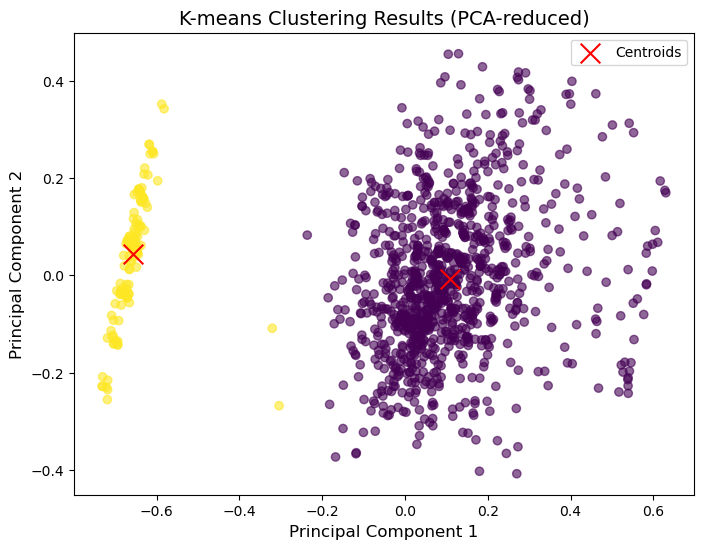

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import warnings

# Read dataset
X = pd.read_excel("../coffeeDataSynthesized.xlsx", "dataset")

# Extracting labels
y = np.where(X["type"] == "robusta", 0, 1)  # Convert type to numeric: 0 for robusta, 1 for arabica
y = pd.Series(y)

# Extracting the features for clustering
X_features = X[['width', 'height', 'depth', 'weight']]

# Function to initialize centroids randomly
def initialize_centroids(X, k):
    np.random.seed(44)  # For reproducibility
    random_idx = np.random.choice(X.shape[0], size=k, replace=False)
    return X[random_idx]

# Function to assign clusters based on the closest centroid
def assign_clusters(X, centroids):
    clusters = np.zeros(X.shape[0])
    for i in range(X.shape[0]):
        distances = np.linalg.norm(X[i] - centroids, axis=1)  # Compute distances to centroids
        clusters[i] = np.argmin(distances)  # Assign to the closest centroid
    return clusters

# Function to update centroids by taking the mean of points in each cluster
def update_centroids(X, clusters, k):
    new_centroids = np.zeros((k, X.shape[1]))
    for i in range(k):
        points_in_cluster = X[clusters == i]
        new_centroids[i] = points_in_cluster.mean(axis=0)
    return new_centroids

# K-means algorithm
def kmeans(X, k, max_iters=100):
    centroids = initialize_centroids(X, k)
    for _ in range(max_iters):
        clusters = assign_clusters(X, centroids)
        new_centroids = update_centroids(X, clusters, k)
        
        # Check for convergence (if centroids don't change)
        if np.all(centroids == new_centroids):
            break
        
        centroids = new_centroids
        
    return centroids, clusters

# Set number of clusters (2 categories)
k = 2

# Run k-means clustering on the features
centroids, clusters = kmeans(X_features.to_numpy(), k)

# Add the clusters to the original dataframe for comparison
X['cluster'] = clusters

# Reduce dimensionality to 2D using PCA
pca = PCA(n_components=2)
X_2d = pca.fit_transform(X_features) 

warnings.filterwarnings("ignore", category=UserWarning, message=".*does not have valid feature names.*")

# Plot the data points and centroids
plt.figure(figsize=(8, 6))

# Plot data points with colors based on their cluster
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=clusters, cmap='viridis', marker='o', alpha=0.6)

# Plot the centroids
centroids_2d = pca.transform(centroids)
plt.scatter(centroids_2d[:, 0], centroids_2d[:, 1], c='red', s=200, marker='x', label='Centroids')

# Add labels and title
plt.title("K-means Clustering Results (PCA-reduced)", fontsize=14)
plt.xlabel("Principal Component 1", fontsize=12)
plt.ylabel("Principal Component 2", fontsize=12)
plt.legend()
plt.show()


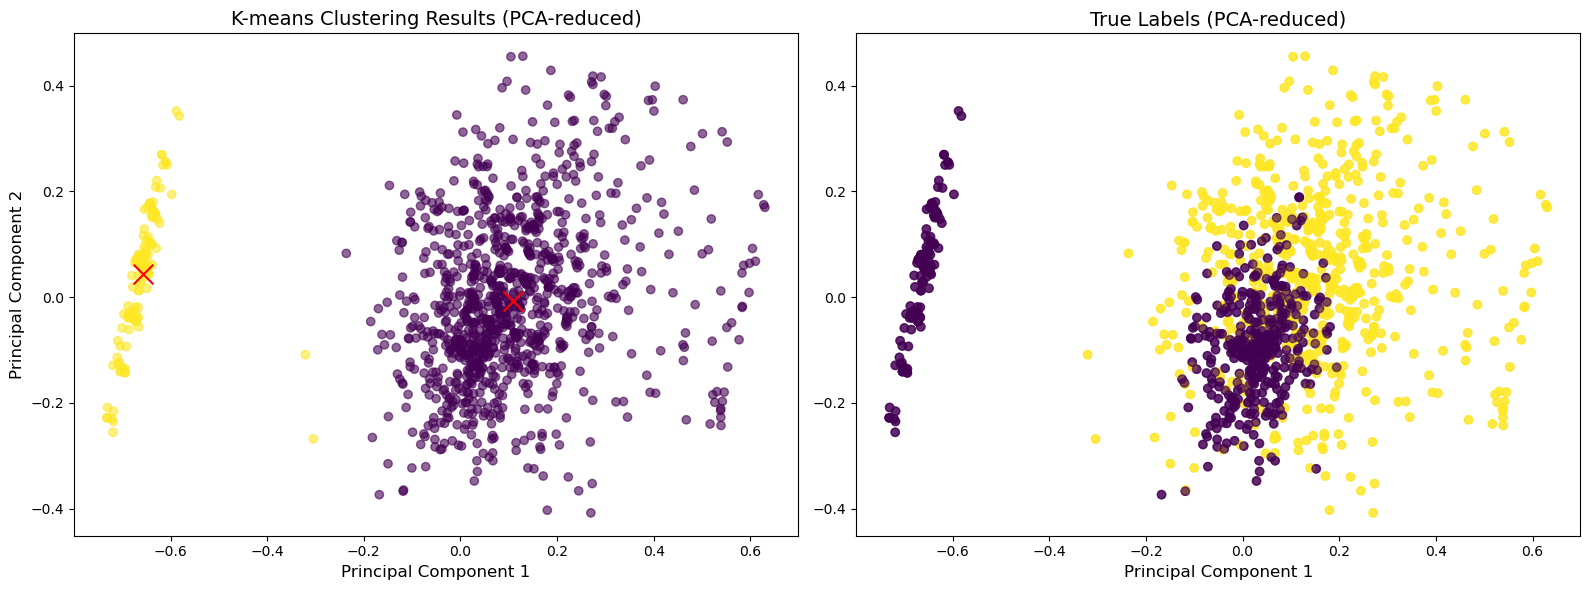

Accuracy score of k-means clustering where k=2: 0.6760


In [3]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import warnings

k = 2  # Number of clusters

# Run k-means clustering on the features
centroids, clusters = kmeans(X_features.to_numpy(), k)

# Add the clusters to the original dataframe for comparison
X['cluster'] = clusters

# Reduce dimensionality to 2D using PCA
pca = PCA(n_components=2)
X_2d = pca.fit_transform(X_features) 

# Assuming `y` is the true label array for the dataset

warnings.filterwarnings("ignore", category=UserWarning, message=".*does not have valid feature names.*")

# Create a figure with two subplots
plt.figure(figsize=(16, 6))

# Plot the data points with clusters on the left
plt.subplot(1, 2, 1)
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=clusters, cmap='viridis', marker='o', alpha=0.6)
# Plot the centroids
centroids_2d = pca.transform(centroids)
plt.scatter(centroids_2d[:, 0], centroids_2d[:, 1], c='red', s=200, marker='x', label='Centroids')

plt.title("K-means Clustering Results (PCA-reduced)", fontsize=14)
plt.xlabel("Principal Component 1", fontsize=12)
plt.ylabel("Principal Component 2", fontsize=12)

# Plot the data points with true labels on the right
plt.subplot(1, 2, 2)
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y, cmap='viridis', marker='o', alpha=0.6)
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y, cmap='viridis', marker='o', alpha=0.6)



plt.title("True Labels (PCA-reduced)", fontsize=14)
plt.xlabel("Principal Component 1", fontsize=12)
# Show the plots
plt.tight_layout()
plt.show()
print("Accuracy score of k-means clustering where k=2: {:.4f}".format(accuracy))

